In [8]:
import numpy as np
import pandas as pd
import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
# import dataset
# features yang digunakan yaitu 'Umum', 'Bahan Makanan','Makanan Jadi, Minuman & Tembakau','Perumahan','Sandang','Kesehatan','Pendidikan','Rekreasi & Olahraga','Transportasi & Komunikasi'
df = pd.read_csv('inflasi.csv', usecols=['Umum','Bahan Makanan','Makanan Jadi, Minuman & Tembakau','Perumahan','Sandang','Kesehatan','Pendidikan, Rekreasi & Olahraga','Transportasi & Komunikasi'])
df.head()

,Umum,Bahan Makanan,"Makanan Jadi, Minuman & Tembakau",Perumahan,Sandang,Kesehatan,"Pendidikan, Rekreasi & Olahraga",Transportasi & Komunikasi
0,159.18,186.89,193.48,157.75,158.59,138.52,121.94,121.12
1,159.20,186.06,193.69,158.18,158.74,139.32,122.47,121.27
2,159.01,184.89,193.50,159.05,158.78,139.62,122.47,121.68
3,158.91,183.80,194.36,159.33,159.98,139.68,122.47,121.60
4,159.01,183.85,194.51,159.38,160.20,140.05,122.47,121.55


In [10]:
df.shape

(12, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Umum                              12 non-null     float64
 1   Bahan Makanan                     12 non-null     float64
 2   Makanan Jadi, Minuman & Tembakau  12 non-null     float64
 3   Perumahan                         12 non-null     float64
 4   Sandang                           12 non-null     float64
 5   Kesehatan                         12 non-null     float64
 6   Pendidikan, Rekreasi & Olahraga   12 non-null     float64
 7   Transportasi & Komunikasi         12 non-null     float64
dtypes: float64(8)
memory usage: 896.0 bytes


In [12]:
df.describe()

,Umum,Bahan Makanan,"Makanan Jadi, Minuman & Tembakau",Perumahan,Sandang,Kesehatan,"Pendidikan, Rekreasi & Olahraga",Transportasi & Komunikasi
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,162.063333,191.370000,197.475833,161.025833,160.789167,140.968333,122.603333,122.302500
std,3.690864,8.001037,4.153939,2.690720,1.702631,1.804700,0.259907,1.626788
min,158.910000,183.800000,193.480000,157.750000,158.590000,138.520000,121.940000,121.120000
25%,159.137500,185.767500,194.192500,159.260000,159.680000,139.665000,122.470000,121.572500
50%,160.890000,188.830000,196.025000,160.700000,160.725000,140.500000,122.680000,121.730000
75%,163.612500,194.115000,200.607500,162.290000,161.807500,141.965000,122.820000,122.317500
max,170.620000,209.590000,206.410000,166.940000,164.290000,145.030000,122.830000,127.160000


<Figure size 720x576 with 0 Axes>

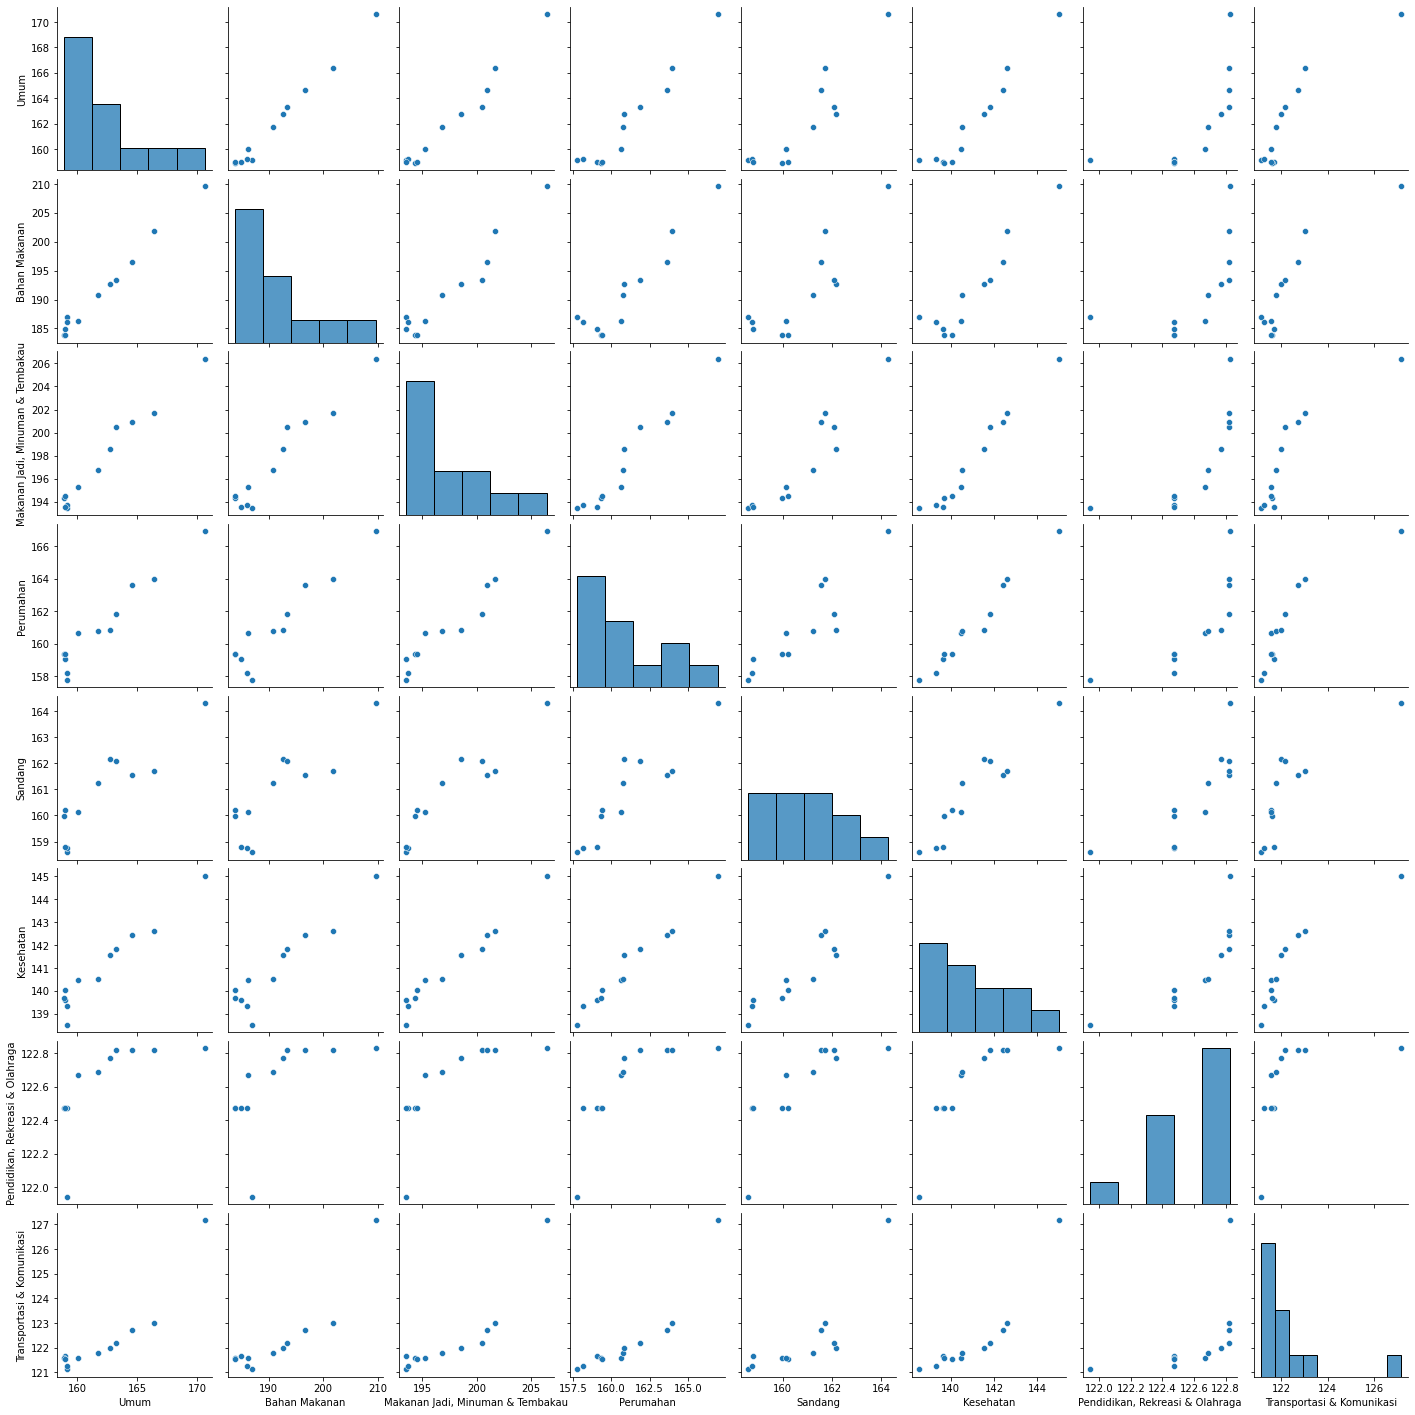

In [13]:
# melihat hubungan antara independent dan dependent
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Umum','Bahan Makanan','Makanan Jadi, Minuman & Tembakau','Perumahan','Sandang','Kesehatan','Pendidikan, Rekreasi & Olahraga','Transportasi & Komunikasi'])
plt.show()

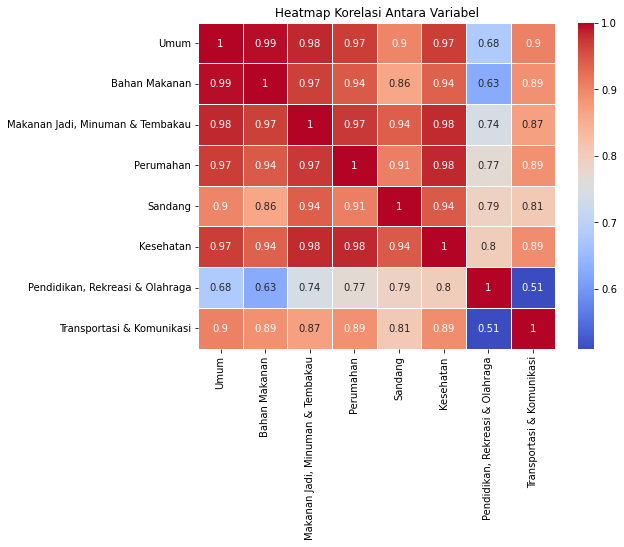

In [16]:
# Matrix Korelasi
corr_matrix = df.corr()
# heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

In [17]:
# variabel x dan y
x = df.drop(columns = 'Umum')
y = df['Umum']

In [18]:
# split data training dan testing 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=4)

In [19]:
# cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9, 7)
(9,)
(3, 7)
(3,)


In [20]:
# Menentukan object linear regresi
lin_reg = LinearRegression()

In [21]:
# Menentukan train the model dengan training data yang sudah di split
lin_reg.fit(x_train, y_train)

LinearRegression()

In [22]:
# nilai slope/koefisien (m) dan intercept(b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[0.30881178 0.08660781 0.11261831 0.11071008 0.12966823 0.13717777
 0.11223715]
1.1029796961219347


In [23]:
coef_dict = {
    'features': x.columns,
    'coef_value': lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,Bahan Makanan,0.308812
1,"Makanan Jadi, Minuman & Tembakau",0.086608
2,Perumahan,0.112618
3,Sandang,0.110710
4,Kesehatan,0.129668
5,"Pendidikan, Rekreasi & Olahraga",0.137178
6,Transportasi & Komunikasi,0.112237


In [24]:
y_pred = lin_reg.predict(x_test)

In [25]:
# accuray score testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.9999948291193477

In [26]:
# prediksi tingkat inflasi
lin_reg.predict([[209,206,166,164,145,122,128]])

array([170.24088172])